Segmenting and Clustering Neighborhoods in Toronto:

The project includes scraping the Wikipedia page - 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
#read wikipedia page for toronto neighborhoods
page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
soup = BeautifulSoup(page.text,'html.parser')

In [4]:
table = soup.find('table').find_all('td')

In [5]:
#Search all the postcode, borough, neighborhood 
table_contents = []
for i in range(0,len(table)):
    cell = {}
    cell['PostalCode'] = table[i].contents[1].text[:3]
    if table[i].contents[1].contents[2].text == 'Not assigned':
        cell['Borough'] = 'Not assigned'
        cell['Neighborhood'] = 'Not assigned'
    else:
        cell['Borough'] = table[i].contents[1].contents[2].text.split('(')[0]
        cell['Neighborhood'] = table[i].contents[1].contents[2].text.split('(')[1][:-1].replace(' /',',')
        table_contents.append(cell)  

In [6]:
import pandas as pd

In [7]:
# Create dataframe from above list
df=pd.DataFrame(table_contents)

In [8]:
# Remove all the 'not assigned' boroughs from the dataframe 
df=df[df.Borough != 'Not assigned']
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [9]:
df.shape

(103, 3)

In [10]:
# install geocoder in anaconda prompt - 'pip install geocoder'
import geocoder 

In [11]:
def get_geocode(postal_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

Tried geocoder, but runtime is very high

In [12]:
# read csv file
geocode_df = pd.read_csv('Geospatial_Coordinates.csv')

In [13]:
geocode_df.rename(columns = {'Postal Code':'PostalCode'},inplace = True)

In [14]:
# joining two dataframes using pandas
result = pd.merge(df,geocode_df,on='PostalCode')

In [15]:
result

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Clustering the neighborhoods of Toronto

In [16]:
# consider only toronto borough
final_table = result[result['Borough'].str.contains('Toronto',regex = False)]

In [17]:
final_table

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


In [18]:
import folium

In [19]:
# Visualizing all the Toronto neighborhoods using folium

map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(final_table['Latitude'],final_table['Longitude'],final_table['Borough'],final_table['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    parse_html=False).add_to(map_toronto)
map_toronto

The map is not visible on Github. Check README for the map1.

In [20]:
# Identifying the optimal number of clusters
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
mms = MinMaxScaler()
mms.fit(final_table[['Latitude','Longitude']])
data_transformed = mms.transform(final_table[['Latitude','Longitude']])

In [22]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

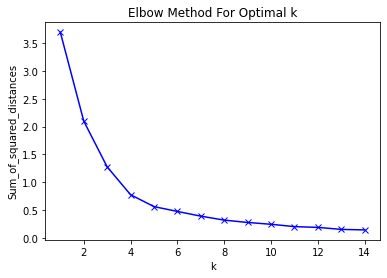

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the elbow method, the optimal clusters for this analysis is 5

In [24]:
# perform k means clusturing
kmeans = KMeans(n_clusters = 5,random_state = 0).fit(final_table[['Latitude','Longitude']])
kmeans.labels_

array([0, 0, 0, 3, 0, 0, 2, 0, 4, 3, 0, 2, 3, 0, 2, 3, 0, 3, 1, 1, 1, 1,
       4, 1, 2, 4, 1, 2, 4, 1, 2, 1, 0, 0, 0, 0, 0, 0, 3])

In [25]:
final_table.insert(0, 'Cluster Labels', kmeans.labels_)

In [26]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [27]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_table['Latitude'], final_table['Longitude'], final_table['Neighborhood'], final_table['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The map is not visible on Github. Check README for the map2.